In [5]:
!pip install pandas matplotlib


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 7.2 MB/s eta 0:00:02
   -- ------------------------------------- 0.8/11.0 MB 1.6 MB/s eta 0:00:07
   ----- ---------------------------------- 1.6/11.0 MB 2.9 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.0 MB 2.1 MB/s eta 0:00:05
   -------- ------------------------------- 2.4/11.0 MB 2.3 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/11.0 MB 2.5 MB/s eta 0:00:04
   ------------- -------------------------- 3.7/11.0 MB 2.5 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/11.0 MB 2.6 MB/s eta 0:00:03
   ----------------- ---------------------- 4.7/11.0 MB 2.6 MB/s eta 0:00:03
   ------------------- -------------------- 5.2/11.0 MB 2.5 MB/s eta 0:00:03
   --------------------- ------------------ 5.8/11.0 MB 2.5 MB/s eta 0:00:03
   --------------------- ------------------ 6.0/11.0 MB 2.4 MB/s eta 0:00:03
   ---


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install matplotlib jinja2 weasyprint




[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


[+] Report generated: vulnerability_report.html


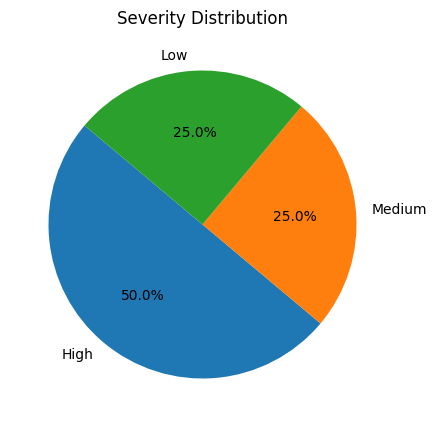

In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import base64
from io import BytesIO


findings = [
    {"Vulnerability": "IDOR", "Endpoint": "/vulnerabilities/idor/?id=1", "Severity": "High", "Mitigation": "Implement proper access control checks"},
    {"Vulnerability": "SQL Injection", "Endpoint": "/vulnerabilities/sqli/?id=2", "Severity": "High", "Mitigation": "Use prepared statements"},
    {"Vulnerability": "XSS", "Endpoint": "/vulnerabilities/xss_r/?name=test", "Severity": "Medium", "Mitigation": "Apply input sanitization"},
    {"Vulnerability": "CSRF", "Endpoint": "/vulnerabilities/csrf/", "Severity": "Low", "Mitigation": "Use anti-CSRF tokens"}
]

df = pd.DataFrame(findings)


severity_counts = df["Severity"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Severity Distribution")


buf = BytesIO()
plt.savefig(buf, format="png")
buf.seek(0)
chart_base64 = base64.b64encode(buf.read()).decode("utf-8")
buf.close()


html_content = f"""
<html>
<head>
    <title>Vulnerability Report</title>
    <style>
        body {{ font-family: Arial, sans-serif; margin: 40px; }}
        h1 {{ text-align: center; }}
        table {{ width: 100%; border-collapse: collapse; margin-top: 20px; }}
        th, td {{ border: 1px solid #ddd; padding: 8px; text-align: left; }}
        th {{ background-color: #f2f2f2; }}
        .chart {{ text-align: center; margin-top: 20px; }}
    </style>
</head>
<body>
    <h1>Vulnerability Report</h1>
    <table>
        <tr>
            <th>Vulnerability Type</th>
            <th>Affected Endpoint</th>
            <th>Severity Level</th>
            <th>Suggested Mitigation</th>
        </tr>
"""

for _, row in df.iterrows():
    html_content += f"""
        <tr>
            <td>{row['Vulnerability']}</td>
            <td>{row['Endpoint']}</td>
            <td>{row['Severity']}</td>
            <td>{row['Mitigation']}</td>
        </tr>
    """

html_content += f"""
    </table>
    <div class="chart">
        <h2>Severity Distribution</h2>
        <img src="data:image/png;base64,{chart_base64}" />
    </div>
</body>
</html>
"""

with open("vulnerability_report.html", "w") as f:
    f.write(html_content)

print("[+] Report generated: vulnerability_report.html")


